In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random


In [2]:
random.seed(380)

In [3]:
def generate_connected_random_weighted_graph(num_nodes, num_edges, weight_range=(1, 10)):
    if num_edges < num_nodes - 1:
        raise ValueError("Количество ребер должно быть не меньше, чем num_nodes - 1 для связного графа.")

    # Создаем пустой граф
    G = nx.Graph()

    # Добавляем узлы в граф
    G.add_nodes_from(range(num_nodes))

    # Создаем связный граф, начиная с дерева
    for node1 in range(num_nodes - 1):
        node2 = node1 + 1
        weight = random.uniform(weight_range[0], weight_range[1])
        G.add_edge(node1, node2, weight=weight)

    # Добавляем дополнительные случайные ребра, чтобы достичь заданного числа ребер
    while G.number_of_edges() < num_edges:
        node1 = random.randint(0, num_nodes - 1)
        node2 = random.randint(0, num_nodes - 1)

        if node1 != node2 and not G.has_edge(node1, node2):
            weight = random.uniform(weight_range[0], weight_range[1])
            G.add_edge(node1, node2, weight=weight)

    return G


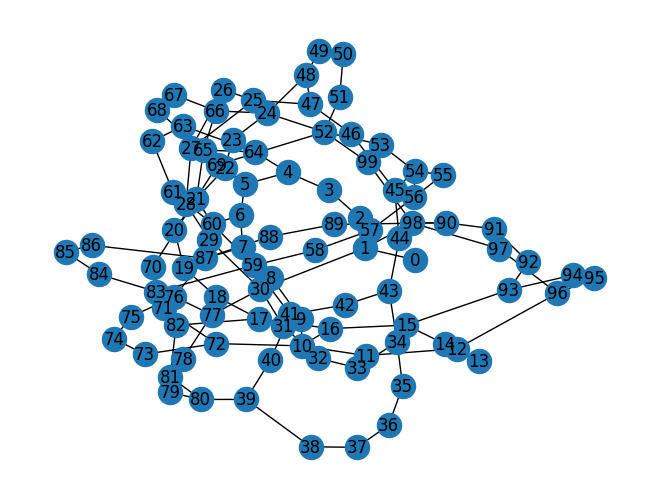

In [4]:
n = 100
m = random.randint(n-1, 3*n)
G = generate_connected_random_weighted_graph(n, m)
weights = nx.get_edge_attributes(G, 'weight')
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels = True)
# nx.draw_networkx_edge_labels(G, pos, nx.get_edge_attributes(G, 'weight'))
plt.show()

In [5]:
G

In [6]:
for v in G.nodes:
  print(repr(v))

for e, w in G.edges.items():
  v, u = e
  print(v, u, w['weight'])


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0 1 3.9693752157538835
1 2 6.080976155867514
1 98 9.088200663068143
1 30 3.159022832440532
2 3 5.9283491705953955
3 4 8.591126320662063
4 5 4.939136363758079
4 64 8.683986113602678
5 6 7.716829495254416
5 22 6.771043984684545
5 69 3.6366515210903736
6 7 8.218388071817383
6 60 3.0089218109305578
7 8 6.4870988855330065
7 87 5.73075122440478
8 9 3.3654828392872194
9 10 5.090295635249762
10 11 7.5107797204610485
10 72 5.502145419157977
10 16 7.289275832144878
11 12 3.3668679628537728
11 33 7.283263382321619
12 13 3.393458459572545
12 96 1.0534424988787223
13 14 6.001266081613974
14 15 8.291221241534798
15 16 9.257243196407387
15 93 2.6191539457044293
16 17 9.134599312695531
17 18 9.208975895293472
17 82 2

In [7]:
globalColor = 1

class Vortex:
    def __init__(self, v, color=0):
        self.v = v
        self.color = color
        self.neighbors = []

    def connect(self, other):
        self.neighbors.append(other)
        other.neighbors.append(self)
        if self.color == 0 and other.color == 0:
            global globalColor
            self.color = globalColor
            globalColor += 1
        elif self.color == 0:
            self, other = other, self

        other.color = self.color
        other.paint_()

    def paint_(self):
        for neighbor in self.neighbors:
            if neighbor.color != self.color:
                neighbor.color = self.color
                neighbor.paint_()


E = {}
V = {v: Vortex(v) for v in G.nodes}


def cycle_created(v, u):
    if V[v].color != 0 and V[u].color != 0 and V[v].color == V[u].color:
        return True
    return False


res = 0

for e, vv in G.edges.items():
    v, u = e
    w = vv['weight']
    if w > res:
        res = w
    if v == u:
        continue
    if v > u:
        v, u = u, v
    if (v, u) in E and E[(v, u)] < w or (v, u) not in E:
        E[(v, u)] = w

E_sorted = sorted([(vu[0], vu[1], w) for vu, w in E.items()], key=lambda x: x[2])
res = []
for v, u, w in E_sorted:
    if not cycle_created(v, u):
        V[v].connect(V[u])
        res.append((v, u, w))

res

[(69, 70, 1.0154202300944037),
 (12, 96, 1.0534424988787223),
 (26, 27, 1.259187329145226),
 (96, 97, 1.42650325116565),
 (86, 87, 1.480630726061841),
 (68, 69, 1.5471543996091492),
 (63, 64, 1.575760916936337),
 (89, 90, 1.6845592611067448),
 (25, 27, 1.8111747131207112),
 (38, 39, 1.8547859029047564),
 (52, 69, 1.9955208914605316),
 (61, 62, 2.0950108630752626),
 (24, 48, 2.2264997320335733),
 (97, 98, 2.3202108592443977),
 (64, 65, 2.451549520784346),
 (33, 34, 2.5662843389239516),
 (15, 93, 2.6191539457044293),
 (17, 82, 2.745009059252948),
 (59, 83, 2.8629539562666384),
 (98, 99, 2.8949388244452434),
 (23, 24, 2.9774543091497803),
 (81, 82, 2.9777775104302977),
 (6, 60, 3.0089218109305578),
 (50, 51, 3.1551322700079965),
 (1, 30, 3.159022832440532),
 (8, 9, 3.3654828392872194),
 (11, 12, 3.3668679628537728),
 (12, 13, 3.393458459572545),
 (91, 92, 3.4565311965659165),
 (72, 73, 3.4825684559469803),
 (93, 94, 3.5360564719187333),
 (5, 69, 3.6366515210903736),
 (21, 65, 3.9452165285

Количество кластеров - 3

In [8]:
res.sort(key=lambda x: -x[2])
res

[(44, 45, 9.121983718870686),
 (20, 21, 8.741022092811658),
 (18, 19, 8.733065220800903),
 (51, 52, 8.646148506427108),
 (43, 44, 8.497562028301417),
 (58, 59, 8.477513514934218),
 (41, 42, 8.337119774092889),
 (90, 91, 8.125593764580188),
 (75, 76, 7.957168468600482),
 (30, 31, 7.9236228284252785),
 (54, 56, 7.8647844587916875),
 (59, 60, 7.6672696992378055),
 (10, 16, 7.289275832144878),
 (11, 33, 7.283263382321619),
 (76, 77, 7.266464550716151),
 (52, 99, 7.067064840352721),
 (34, 43, 6.919703689364108),
 (53, 54, 6.907234139596968),
 (49, 50, 6.788018610031545),
 (36, 37, 6.73986374721291),
 (56, 57, 6.682944589172981),
 (70, 71, 6.607470450902277),
 (39, 40, 6.60369603430685),
 (25, 47, 6.582394075074953),
 (52, 53, 6.577860628224608),
 (83, 84, 6.557091777885018),
 (19, 20, 6.536811666087893),
 (66, 67, 6.507713463628524),
 (7, 8, 6.4870988855330065),
 (32, 33, 6.442165911091388),
 (34, 35, 6.43834933787484),
 (67, 68, 6.430617183937263),
 (80, 81, 6.250869783146591),
 (87, 88, 6

In [9]:
CLUSTERS_NUM = 3

In [10]:
del res[:CLUSTERS_NUM-1]
res

[(18, 19, 8.733065220800903),
 (51, 52, 8.646148506427108),
 (43, 44, 8.497562028301417),
 (58, 59, 8.477513514934218),
 (41, 42, 8.337119774092889),
 (90, 91, 8.125593764580188),
 (75, 76, 7.957168468600482),
 (30, 31, 7.9236228284252785),
 (54, 56, 7.8647844587916875),
 (59, 60, 7.6672696992378055),
 (10, 16, 7.289275832144878),
 (11, 33, 7.283263382321619),
 (76, 77, 7.266464550716151),
 (52, 99, 7.067064840352721),
 (34, 43, 6.919703689364108),
 (53, 54, 6.907234139596968),
 (49, 50, 6.788018610031545),
 (36, 37, 6.73986374721291),
 (56, 57, 6.682944589172981),
 (70, 71, 6.607470450902277),
 (39, 40, 6.60369603430685),
 (25, 47, 6.582394075074953),
 (52, 53, 6.577860628224608),
 (83, 84, 6.557091777885018),
 (19, 20, 6.536811666087893),
 (66, 67, 6.507713463628524),
 (7, 8, 6.4870988855330065),
 (32, 33, 6.442165911091388),
 (34, 35, 6.43834933787484),
 (67, 68, 6.430617183937263),
 (80, 81, 6.250869783146591),
 (87, 88, 6.105937476673408),
 (92, 93, 6.09736687576377),
 (1, 2, 6.08

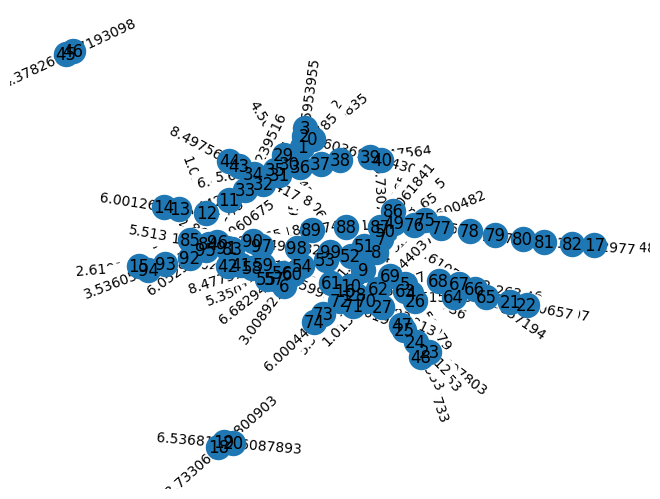

In [11]:
G2 = nx.Graph()
dots = G.nodes
G2.add_nodes_from(dots)
G2.add_weighted_edges_from(res)
weights = nx.get_edge_attributes(G2, 'weight')
pos = nx.spring_layout(G2)
nx.draw(G2, pos, with_labels = True)
nx.draw_networkx_edge_labels(G2, pos, nx.get_edge_attributes(G2, 'weight'))
plt.show()

In [12]:
V = {v: Vortex(v) for v in G2.nodes}
for v, u, w in res:
    V[v].connect(V[u])

In [13]:
counter = 1
conerter = {0: 0,}

In [14]:
print("Hint: clusters with no. 0 are all single objects")
print("vortex\tcluster")
for val, v in V.items():
    if v.color not in conerter:
        conerter[v.color] = counter
        counter += 1
    print(f"{v.v}\t{conerter[v.color]}")

Hint: clusters with no. 0 are all single objects
vortex	cluster
0	1
1	1
2	1
3	1
4	1
5	1
6	1
7	1
8	1
9	1
10	1
11	1
12	1
13	1
14	1
15	1
16	1
17	1
18	2
19	2
20	2
21	1
22	1
23	1
24	1
25	1
26	1
27	1
28	1
29	1
30	1
31	1
32	1
33	1
34	1
35	1
36	1
37	1
38	1
39	1
40	1
41	1
42	1
43	1
44	1
45	3
46	3
47	1
48	1
49	1
50	1
51	1
52	1
53	1
54	1
55	1
56	1
57	1
58	1
59	1
60	1
61	1
62	1
63	1
64	1
65	1
66	1
67	1
68	1
69	1
70	1
71	1
72	1
73	1
74	1
75	1
76	1
77	1
78	1
79	1
80	1
81	1
82	1
83	1
84	1
85	1
86	1
87	1
88	1
89	1
90	1
91	1
92	1
93	1
94	1
95	1
96	1
97	1
98	1
99	1
